# **Group: Jaswanth Kranthi Boppana, Manav Mandal, Sayan Das, Vishnu-vardhan Reddy Kollu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Take at least 100 images per class with at least 3 classes using your phone/camera

We have made a dataset consists of 3 different leaf images. These images where collected manually by using mobile phone camera.The following are the names of the classes.
1. Annona_Muricata_leaf   --160 images
2. Malabar_Nut_leaf       --160 images
3. Tulsi_leaf             --160 images

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
def display_random_images(directory_path, num_images=5):
    # Get a list of all files in the directory
    all_files = os.listdir(directory_path)
    # Filter the files to keep only those with common image file extensions
    image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'))]
    # Randomly select num_images from the list
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    print(f"No.of Images in The class are '{len(image_files)}'")
    # Display the selected images after rotating each by 90 degrees
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(selected_images, 1):
        image_path = os.path.join(directory_path, image_file)
        # Display the original image
        plt.subplot(2, num_images, i)
        plt.imshow(Image.open(image_path))
        plt.title(f'Image {i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Printing the no.of images in a particular class and Displaying 5 random images from the respective class.**

Displaying no.of Images and 5 Random images from **Annona_Muricata_leaf** class

No.of Images in The class are '160'


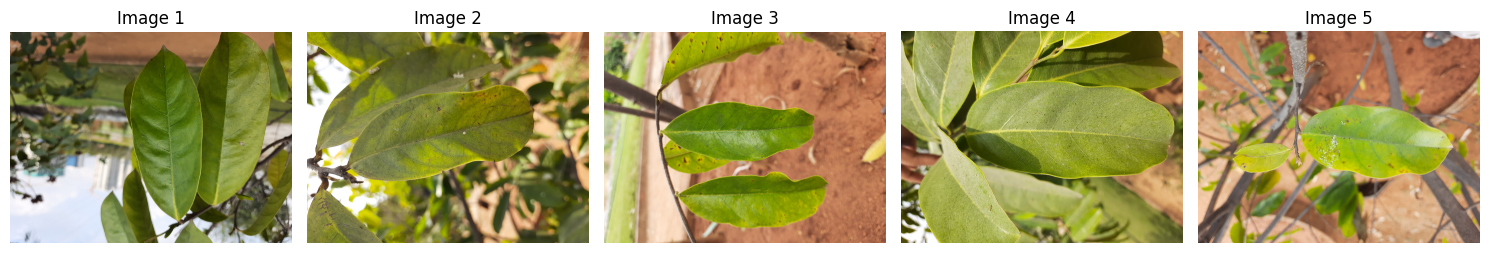

In [ ]:
directory_path = "/content/drive/MyDrive/AML_HW_4_Dataset/Annona_Muricata_leaf"
# Call the function to display randomly selected images and their rotated versions
display_random_images(directory_path, num_images=5)

Displaying no.of Images and 5 Random images from **Malabar_Nut_leaf** class

No.of Images in The class are '160'


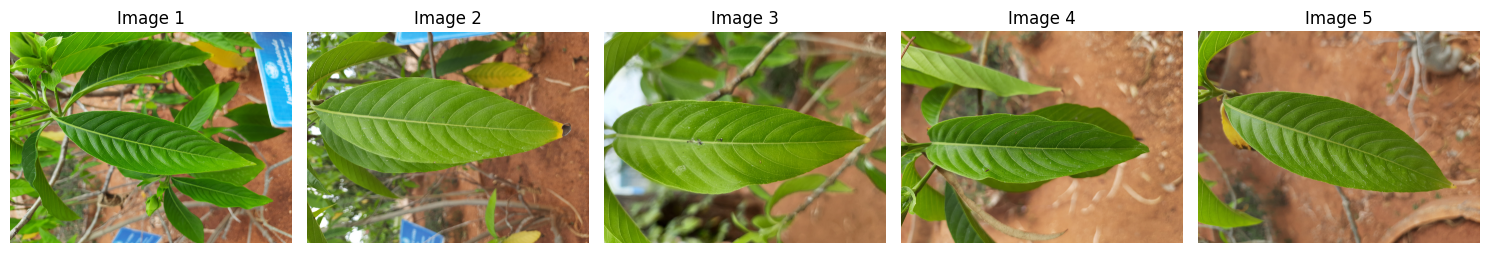

In [ ]:
directory_path = "/content/drive/MyDrive/AML_HW_4_Dataset/Malabar_Nut_leaf"
# Call the function to display randomly selected images and their rotated versions
display_random_images(directory_path, num_images=5)

Displaying no.of Images and 5 Random images from **Tulsi_leaf** class

No.of Images in The class are '160'


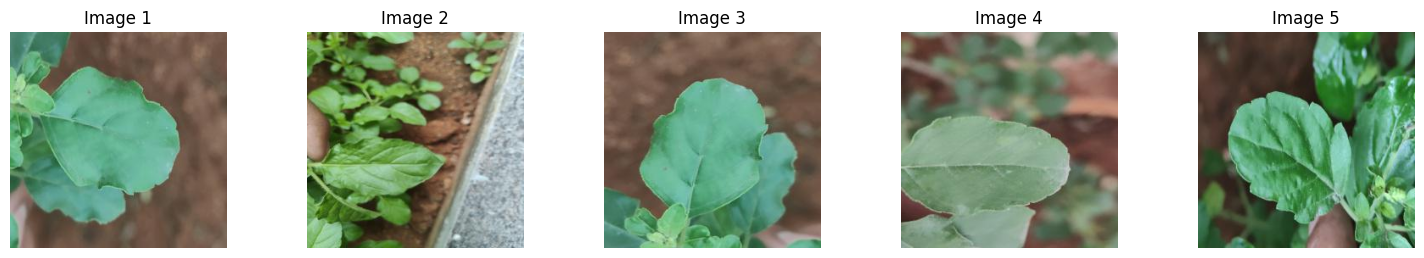

In [ ]:
directory_path ="/content/drive/MyDrive/AML_HW_4_Dataset/Tulsi_leaf"
display_random_images(directory_path, num_images=5)

# 2. Splititng the Data into Train, Validation and Test Set

**Here we are spliting the Dataset into Train, Test and validation sets in the ratio of 0.8,0.1,0.1 respectively for each class. The data  is splited and stored in separate folders named train, test and validation which is later used for preprocessing and augmentation techniques.**

In [ ]:
#spliting the Image Dataset into Train,Test and Validation.
import os
import shutil
import random

# Set paths for input and output directories
input_dir = '/content/drive/MyDrive/AML_HW_4_Dataset'
train_dir = '/content/drive/MyDrive/AML_HW_4_Dataset/train'
val_dir = '/content/drive/MyDrive/AML_HW_4_Dataset/validation'
test_dir = '/content/drive/MyDrive/AML_HW_4_Dataset/test'

class_names = ['Annona_Muricata_leaf', 'Malabar_Nut_leaf', 'Tulsi_leaf']

# Create output directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set the split ratio for training, validation, and testing sets
train_split = 0.8
val_split = 0.1
test_split = 0.1

# Loop through each class folder in the input directory
for class_name in class_names:
    class_dir = os.path.join(input_dir, class_name)

    # Create class subdirectories in output directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get a list of all image files in the class folder
    image_files = os.listdir(class_dir)

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Split the image files into training, validation, and testing sets
    train_size = int(train_split * len(image_files))
    val_size = int(val_split * len(image_files))
    test_size = len(image_files) - train_size - val_size

    train_files = image_files[:train_size]
    val_files = image_files[train_size:train_size+val_size]
    test_files = image_files[train_size+val_size:]

    # Move the image files to their respective output directories
    for train_file in train_files:
        shutil.copy(os.path.join(class_dir, train_file), os.path.join(train_dir, class_name, train_file))
    for val_file in val_files:
        shutil.copy(os.path.join(class_dir, val_file), os.path.join(val_dir, class_name, val_file))
    for test_file in test_files:
        shutil.copy(os.path.join(class_dir, test_file), os.path.join(test_dir, class_name, test_file))

In [ ]:
print("Train, Test, Validation split for Each Class :")
print(f"Train Size:       '{train_size}' images")
print(f"Test Size:        '{test_size}'  images")
print(f"Validation Size:  '{val_size}'  images")

Train, Test, Validation split for Each Class :
Train Size:       '128' images
Test Size:        '16'  images
Validation Size:  '16'  images


# 3. Build the input pipeline, including the appropriate preprocessing operations, and add data augmentation.

**Here we are performing Data Prerpocessing and Data Augmentation steps.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your dataset
dataset_path_1 = '/content/drive/MyDrive/AML_HW_4_Dataset/train'
dataset_path_2='/content/drive/MyDrive/AML_HW_4_Dataset/test'
dataset_path_3='/content/drive/MyDrive/AML_HW_4_Dataset/validation'

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear transformations
    zoom_range=0.1,  # Randomly zoom in on images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in newly created pixels during augmentation
)

# Create a data generator for training data
train_gen_data = datagen.flow_from_directory(
    directory=dataset_path_1,
    target_size=(224, 224),  # Target size of the images
    batch_size=32,
    class_mode='categorical'  # Assuming you have multiple classes
)

test_gen_data= datagen.flow_from_directory(
    directory=dataset_path_2,
    target_size=(224, 224),  # Target size of the images
    batch_size=32,
    class_mode='categorical'  # Assuming you have multiple classes
)

Val_gen_data = datagen.flow_from_directory(
    directory=dataset_path_3,
    target_size=(224, 224),  # Target size of the images
    batch_size=32,
    class_mode='categorical'  # Assuming you have multiple classes
)

Found 479 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Found 166 images belonging to 3 classes.


# 4.  Fine-tune a pretrained model of your choice on this dataset. Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified)

In this step We are picking up a ideal pre-trained model and Fine tuning the model to make it adapted to the dataset.

We are using the **MobileNetV2** pre-trained model on the **imagenet** weights.

As a part of fine-tuning have added some additional layers to the pre-tained model and tried different optimizers such as adam, rmsprop and nadam.

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2
base_model = model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
# Build a new model on top of the EfficientNetB0 base
model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
model.fit(train_gen_data, epochs=15, steps_per_epoch=len(train_gen_data),validation_data=Val_gen_data,validation_steps=len(Val_gen_data))

Epoch 1/15
15/15 [==============================] - 159s 10s/step - loss: 1.0343 - accuracy: 0.5303 - val_loss: 1.0821 - val_accuracy: 0.7711
Epoch 2/15
15/15 [==============================] - 103s 7s/step - loss: 0.6541 - accuracy: 0.8205 - val_loss: 1.0578 - val_accuracy: 0.9096
Epoch 3/15
15/15 [==============================] - 78s 5s/step - loss: 0.4705 - accuracy: 0.8580 - val_loss: 1.0332 - val_accuracy: 0.8614
Epoch 4/15
15/15 [==============================] - 74s 5s/step - loss: 0.3520 - accuracy: 0.8998 - val_loss: 1.0159 - val_accuracy: 0.5181
Epoch 5/15
15/15 [==============================] - 71s 5s/step - loss: 0.2992 - accuracy: 0.8977 - val_loss: 0.9988 - val_accuracy: 0.4880
Epoch 6/15
15/15 [==============================] - 73s 5s/step - loss: 0.2249 - accuracy: 0.9457 - val_loss: 0.9841 - val_accuracy: 0.4458
Epoch 7/15
15/15 [==============================] - 70s 5s/step - loss: 0.2115 - accuracy: 0.9415 - val_loss: 0.9621 - val_accuracy: 0.5120
Epoch 8/15
15/15 

**Reporting the Classification Accuracy.**

*   We have obtained a test Classification Accuracy of 85.5 % by using the
    "MobileNetV2" with Imagenet weights




In [ ]:
#Testing Model accuracy on the Test dataset.
model.evaluate(test_gen_data)

6/6 [==============================] - 52s 10s/step - loss: 0.7656 - accuracy: 0.8598


[0.7655811905860901, 0.8597561120986938]

**Displaying Examples of Classification results on the fine tuned model**

In [ ]:
#showing predicted images.
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  if("Malabar_Nut_leaf" in filename):
    actual='Malabar_Nut_leaf'
  elif('Tulsi_leaf' in filename):
    actual='Tulsi_leaf'
  else:
    actual='Annona_Muricata_leaf'
  plt.title(f"Prediction: {pred_class} |  actual: {actual}")
  plt.axis(False);

**Example 1**

1/1 [==============================] - 0s 25ms/step


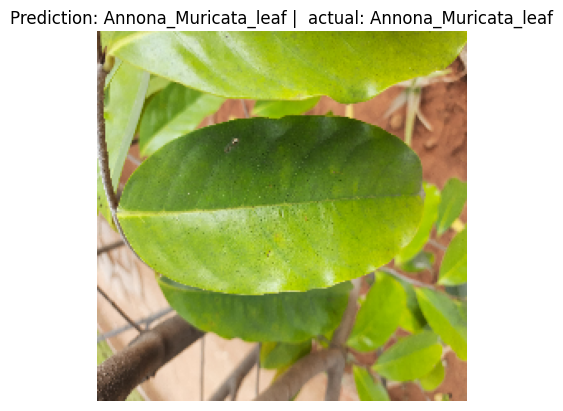

In [ ]:
pred_and_plot(model, '/content/drive/MyDrive/AML_HW_4_Dataset/Annona_Muricata_leaf/Annona_Muricata_leaf (9).jpg', class_names)

**Example 2**

1/1 [==============================] - 0s 22ms/step


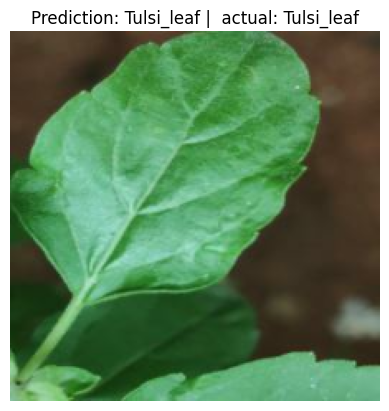

In [ ]:
pred_and_plot(model, '/content/drive/MyDrive/AML_HW_4_Dataset/Tulsi_leaf/Tulsi_leaf (16).jpg', class_names)

**Example 3**

1/1 [==============================] - 0s 24ms/step


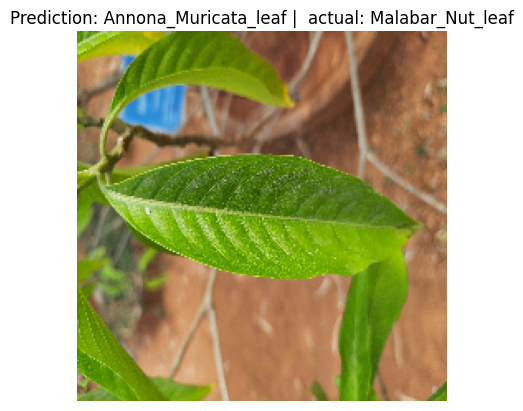

In [ ]:
pred_and_plot(model, '/content/drive/MyDrive/AML_HW_4_Dataset/Malabar_Nut_leaf/Malabar_Nut_leaf (10).jpg', class_names)

# 5. Train from scratch (without pretraining) a deep neural network that contains convolutional layers on this dataset (the one you created in part 3). Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified).

# Training a Model from scratch

 we have used the standard CNN layer and build it up it with adding conventional BatchNormalization and Maxpooling2D layers.

*   We have created a pretrained model from scratch.
*   We have used the standard CNN layer and build it up it with adding
    conventional BatchNormalization and Maxpooling2D layers.
*   We used softmax activation on the output layer as it performes well in
    muliclass classification scenarios.
*   we have tried with different optimizers among which "nadam" optimizer
    resulted in a better performance.





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a simple CNN model
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(3, activation='softmax'))

model_1.compile(optimizer='nadam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])
model_1.fit(train_gen_data, epochs=20, steps_per_epoch=len(train_gen_data),validation_data=Val_gen_data,validation_steps=len(Val_gen_data))


Epoch 1/20
15/15 [==============================] - 64s 4s/step - loss: 11.2450 - accuracy: 0.5957 - val_loss: 0.9899 - val_accuracy: 0.6489
Epoch 2/20
15/15 [==============================] - 58s 4s/step - loss: 0.2334 - accuracy: 0.9376 - val_loss: 1.1638 - val_accuracy: 0.5426
Epoch 3/20
15/15 [==============================] - 59s 4s/step - loss: 0.2152 - accuracy: 0.9419 - val_loss: 2.5460 - val_accuracy: 0.4043
Epoch 4/20
15/15 [==============================] - 58s 4s/step - loss: 0.1695 - accuracy: 0.9548 - val_loss: 2.7184 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 60s 4s/step - loss: 0.1330 - accuracy: 0.9591 - val_loss: 2.4464 - val_accuracy: 0.4574
Epoch 6/20
15/15 [==============================] - 60s 4s/step - loss: 0.0607 - accuracy: 0.9785 - val_loss: 3.4930 - val_accuracy: 0.5638
Epoch 7/20
15/15 [==============================] - 59s 4s/step - loss: 0.0600 - accuracy: 0.9742 - val_loss: 3.5052 - val_accuracy: 0.5745
Epoch 8/20
15/15 [=

**Reporting Model Accuracy**
*   The Model Trained from scratch on the dataset gives 63.7 % Accuracy.



In [ ]:
#model accuracy evaluation
model_1.evaluate(test_gen_data)

3/3 [==============================] - 10s 3s/step - loss: 27.8784 - accuracy: 0.6374


[27.87843894958496, 0.6373626589775085]

**Giving Exmaples of Correct and Incorrect predictions using the self made model.**

**Exmaple 1:**

1/1 [==============================] - 0s 87ms/step
In Annona_Muricata_leaf


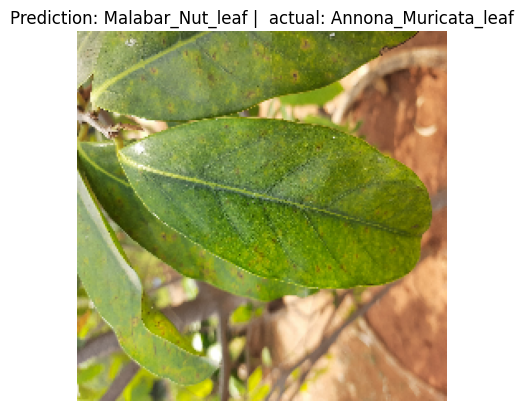

In [ ]:
pred_and_plot(model_1, '/content/drive/MyDrive/AML_HW_4_Dataset/test/Annona_Muricata_leaf/Annona_Muricata_leaf (2).jpg', class_names)

**Example 2:**

1/1 [==============================] - 0s 27ms/step
In Tulsi


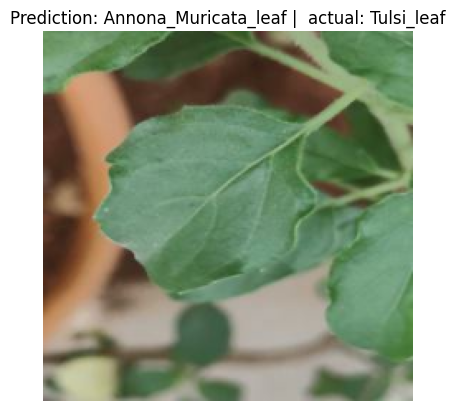

In [ ]:
pred_and_plot(model_1, '/content/drive/MyDrive/AML_HW_4_Dataset/test/Tulsi_leaf/Tulsi_leaf (9).jpg', class_names)

**Example 3:**

1/1 [==============================] - 0s 20ms/step
In malabar


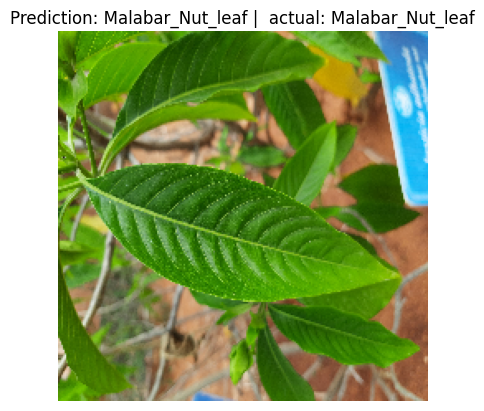

In [ ]:
pred_and_plot(model_1, '/content/drive/MyDrive/AML_HW_4_Dataset/Malabar_Nut_leaf/Malabar_Nut_leaf (3).jpg', class_names)

**Example 4:**

1/1 [==============================] - 0s 21ms/step
In malabar


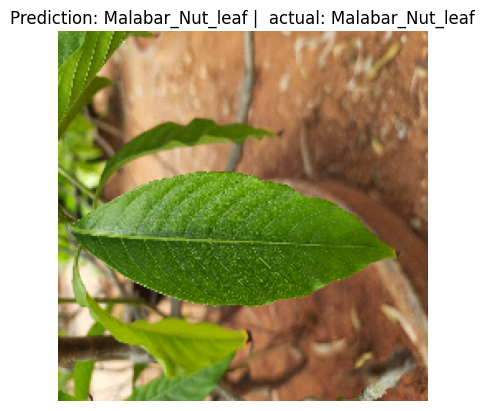

In [ ]:
pred_and_plot(model_1, '/content/drive/MyDrive/AML_HW_4_Dataset/test/Malabar_Nut_leaf/Malabar_Nut_leaf (36).jpg', class_names)